# Regresión logística binaria: MLE y SGD

Sea un modelo de regresión logística binaria $p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\sigma(a))\;$, $y\in\{0,1\}$, con $\;\mu=\sigma(a)\;$ y $\;a=\boldsymbol{w}^t\boldsymbol{x},\;$ en el que asumimos que $\boldsymbol{w}$ absorbe el sesgo $b$. La log-verosimilitud negativa de $\boldsymbol{w}$ respecto a $N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\;$ (normalizada por $N$) es:
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{w})%
&=-\frac{1}{N}\log p(\mathcal{D}\mid\boldsymbol{w})\\%
&=-\frac{1}{N}\log \prod_{n=1}^N \operatorname{Ber}(y_n\mid \mu_n)%
&&\text{($\mu_n=\sigma(a_n)$ con logit $a_n=\boldsymbol{w}^t\boldsymbol{x}_n$)}\\%
&=-\frac{1}{N}\sum_{n=1}^N \log(\mu_n^{y_n}\,(1-\mu_n)^{(1-y_n)})\\%
&=-\frac{1}{N}\sum_{n=1}^N y_n\log\mu_n + (1-y_n)\log(1-\mu_n)\\%
&=\frac{1}{N}\sum_{n=1}^N \mathbb{H}(y_n,\mu_n)%
&&\text{($\mathbb{H}$ entropía cruzada)}%
\end{align*}$$

Es fácil comprobar que el gradiente del objetivo es:
$$\mathbf{\nabla}_{\boldsymbol{w}}\operatorname{NLL}(\boldsymbol{w})=\frac{1}{N}\sum_{n=1}^N(\mu_n-y_n)\boldsymbol{x}_n$$

Una manera sencilla de minimizar el objetivo consiste en aplicar descenso por gradiente estocástico con minibatch de talla uno:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

N, n_clusters_per_class, class_sep = 9, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[-0.76961425 -1.23301708  0.        ]
 [ 1.02328338  0.52901479  1.        ]
 [-1.05564592  1.2622497   1.        ]
 [ 0.77746368  1.45110407  1.        ]
 [-0.53564404  0.95715409  1.        ]
 [ 1.63887707 -0.70714914  0.        ]
 [-0.77086271 -2.29793541  0.        ]
 [-0.23993125 -1.7644993   0.        ]
 [ 0.55925607 -2.60668568  0.        ]]


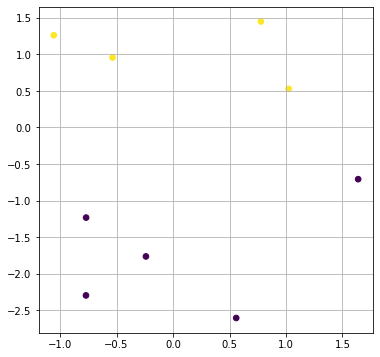

In [2]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]

In [3]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, w[n+1])

1 [0.11544214 0.18495256]
2 [0.25242368 0.25576898]
3 [0.09853896 0.43977096]
4 [0.17516898 0.58279775]
5 [0.11313536 0.69364698]
6 [-0.09548319  0.78366254]
7 [-0.06057562  0.88772171]
8 [-0.04799225  0.98026221]
9 [-0.05978712  1.03523796]


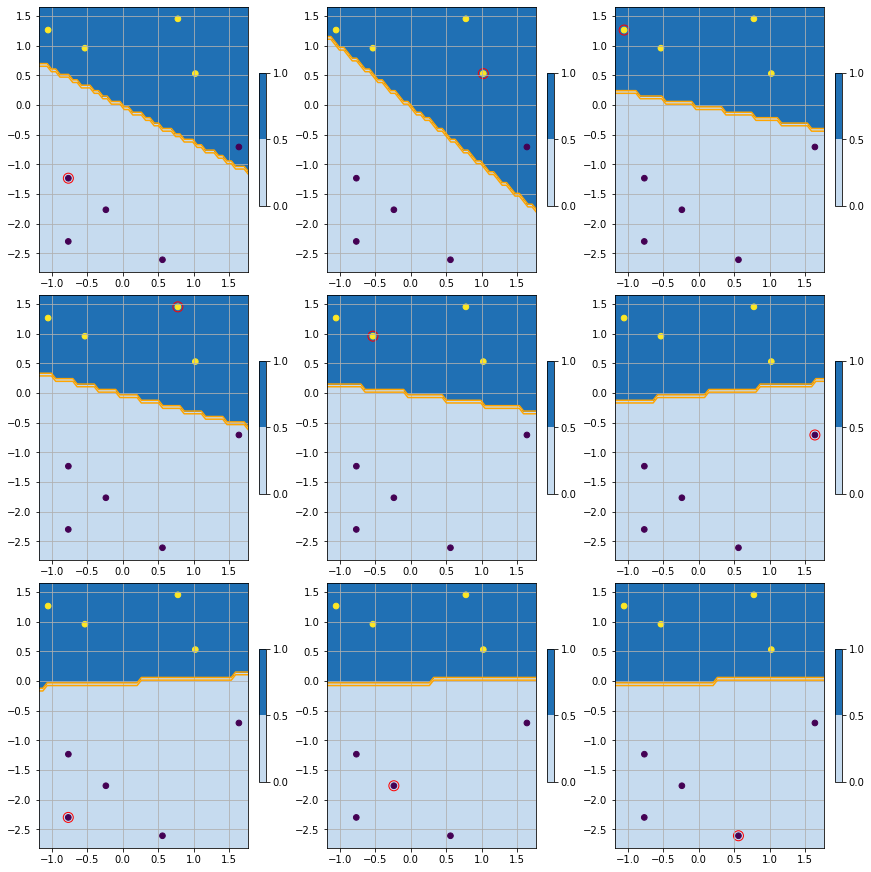

In [4]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=100)